In [638]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [639]:
#load data 
file_path = "/Users/sa21/Desktop/TLAB-Music-Recommendation/Data/processed/Clean_music_data.csv"
df = pd.read_csv(file_path) #read csv 
df.columns

Index(['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age'],
      dtype='object')

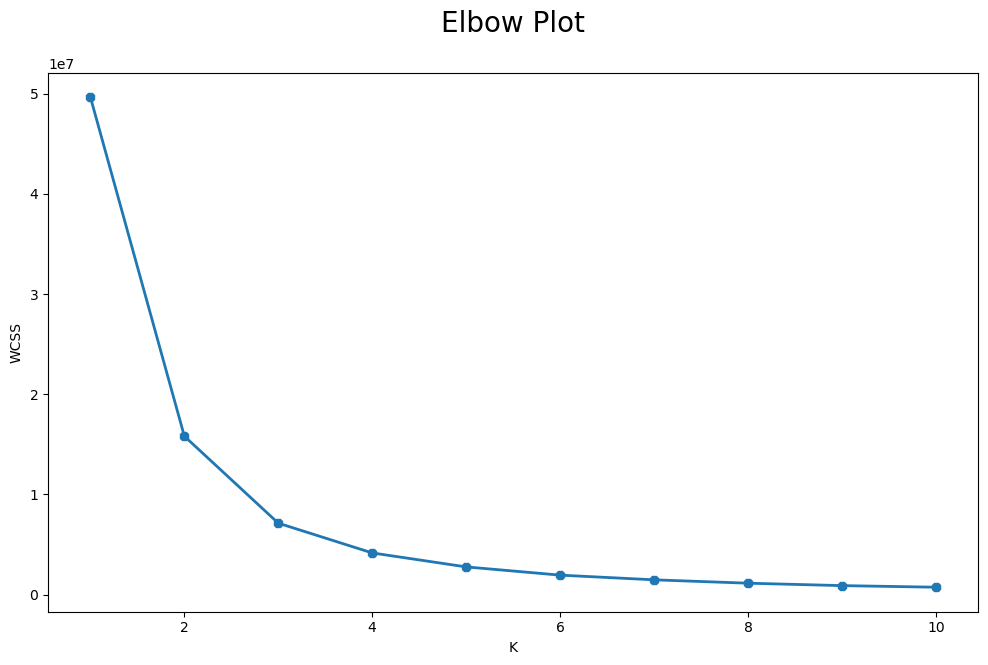

In [658]:

X1 = df.loc[:,['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age']].values
# create an elbow plot
wcss = []
for k in range(1, 11):
    # KMeans model using k clusters and k-means++ 
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), wcss, linewidth=2, marker='8')
plt.title('Elbow Plot\n', fontsize=20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

The elbow appears to be around K=4. After 4, the curve begins to flatten out. I will also create a silhouette plot to better understand the optimal value for K.

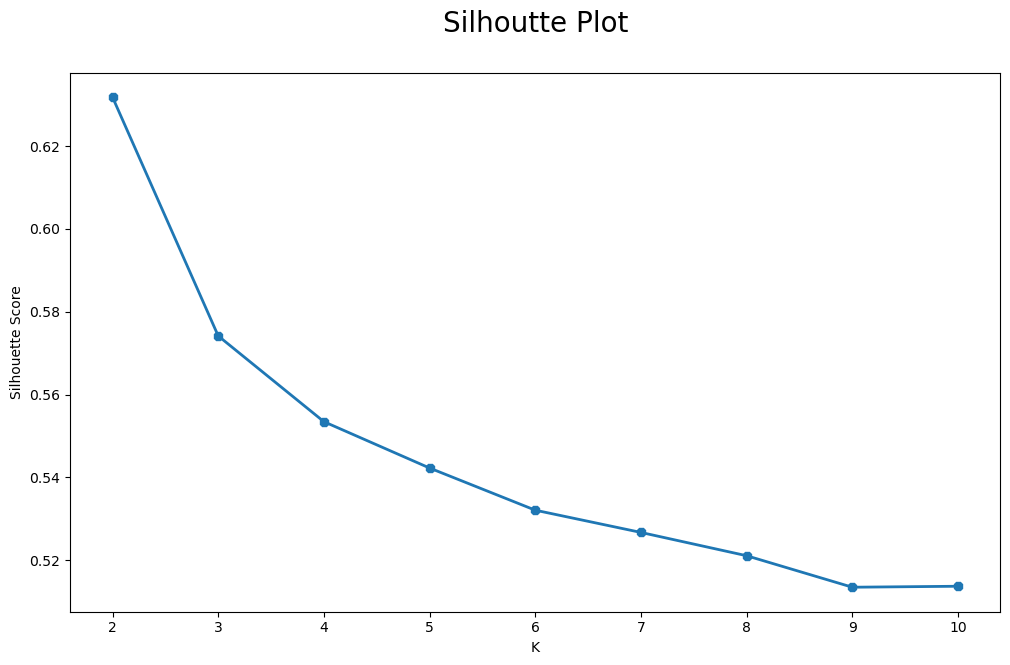

In [659]:
# Plot of silhoutte score
silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters =k, init = 'k-means++')
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

The silhouette score peaks at K=2, but a simple 2-cluster solution might be too basic. Since the elbow plot suggests K=4, I’ll choose that more clusters could capture finer patterns in the data.

In [642]:
#create a KMeans object
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=20, random_state=42)
#fit KMeans object
kmeans.fit(X1)



KMeans(n_clusters=4, n_init=20, random_state=42)

In [643]:
# labels for the  dataset
labels = kmeans.fit_predict(X1)
labels

array([0, 1, 1, ..., 3, 3, 3], dtype=int32)

In [644]:
# output the centroids of your clusters
kmeans.cluster_centers_

array([[1.05784855e+02, 2.04270215e-02, 1.47056391e-01, 1.04572781e-01,
        5.56767163e-02, 2.15281611e-02, 1.81005471e-02, 3.10296776e-02,
        7.16415553e-02, 1.24452357e-01, 5.29636816e-02, 5.93765343e-02,
        4.63353649e-02, 2.53211300e-02, 1.04296113e-01, 3.11464827e-02,
        3.44542016e-01],
       [3.53326558e+01, 2.15363385e-02, 9.54333285e-02, 1.40876671e-01,
        6.13075408e-02, 1.36314603e-02, 1.63487401e-02, 7.16464788e-02,
        8.23656639e-02, 4.25134088e-02, 7.05007061e-02, 3.20482314e-02,
        5.19630790e-02, 2.39092427e-02, 1.58888631e-01, 3.29265759e-02,
        5.03005918e-01],
       [1.65540353e+02, 1.78918404e-02, 1.12138592e-01, 7.21925890e-02,
        3.68788963e-02, 2.50139369e-02, 1.63031157e-02, 1.73753154e-02,
        6.31760791e-02, 3.22147609e-01, 3.50270579e-02, 6.75758599e-02,
        3.48090305e-02, 2.29507973e-02, 4.41194345e-02, 2.46066513e-02,
        3.03374734e-01],
       [6.74374872e+01, 2.19893577e-02, 1.28642073e-01, 1.234

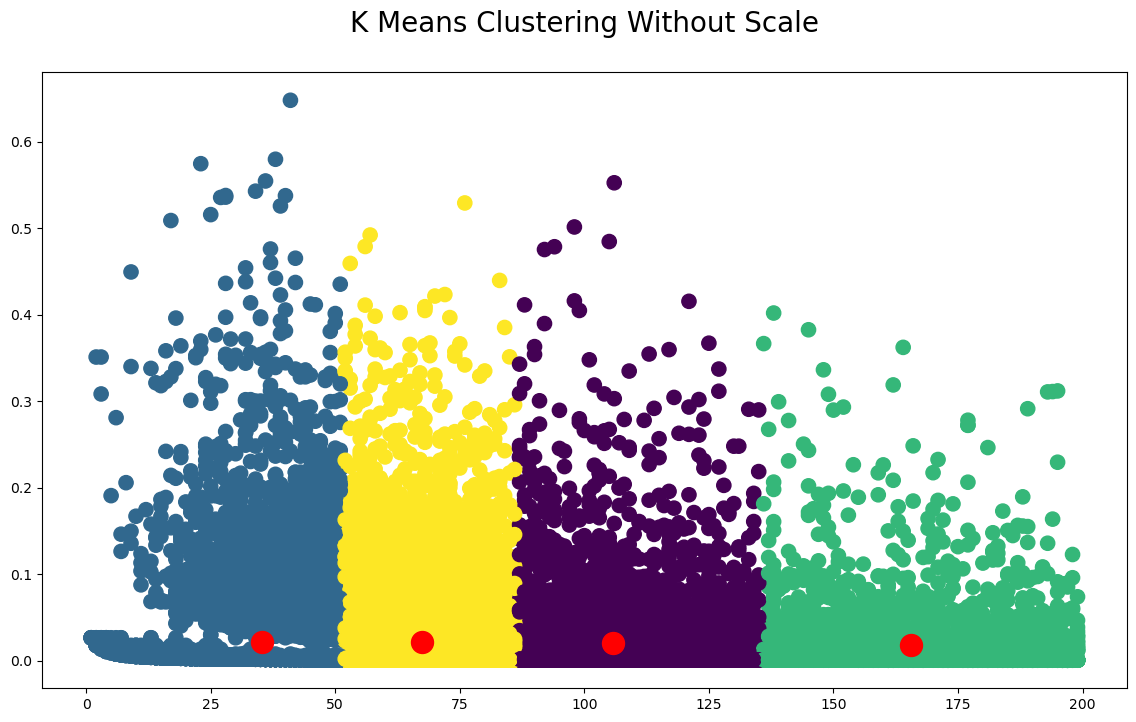

In [645]:
# view 2D clusters
plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('K Means Clustering Without Scale\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

This scatter plot displays the results of K-Means clustering without feature scaling, showing both data points and their centroids. The clustering is clearly dominated by the feature with larger numerical values, as evidenced by the centroids' perfect horizontal alignment. This visualization demonstrates a critical limitation of K-Means: when features aren't scaled, those with greater magnitudes disproportionately influence cluster formation. To address this issue, I will first scale the data to ensure all features contribute equally, then apply PCA to potentially reveal more meaningful cluster patterns.

## KMeans with Scaling and PCA (for visualization only)


In [661]:
# Fit the scaler on data that will be used for model
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

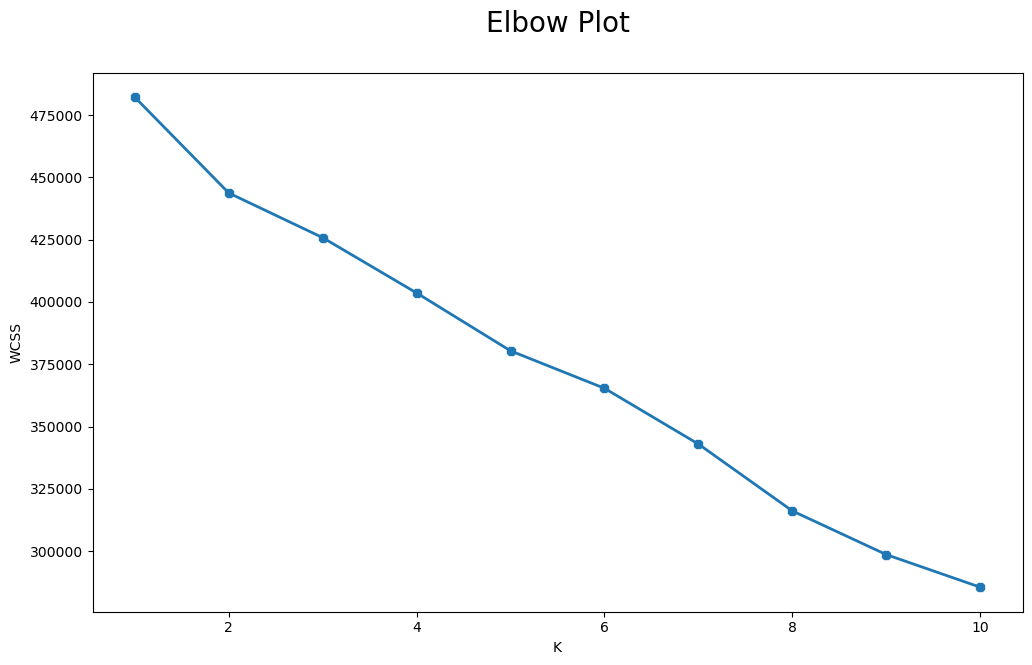

In [662]:
wcss_scaled = []
for k in range(1, 11):
    # Create a KMeans object initialized with `k` clusters and `k-means++`
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)

    # Fit your KMeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # Append the WCSS (inertia) to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), wcss_scaled, linewidth=2, marker='8')
plt.title('Elbow Plot\n', fontsize=20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

The elbow plot's optimal K value isn't perfectly clear, but I estimate the best choice would be K=8 or possibly 9, where the WCSS reduction rate starts going down. To validate this selection, I'll complement the elbow method with silhouette score analysis.


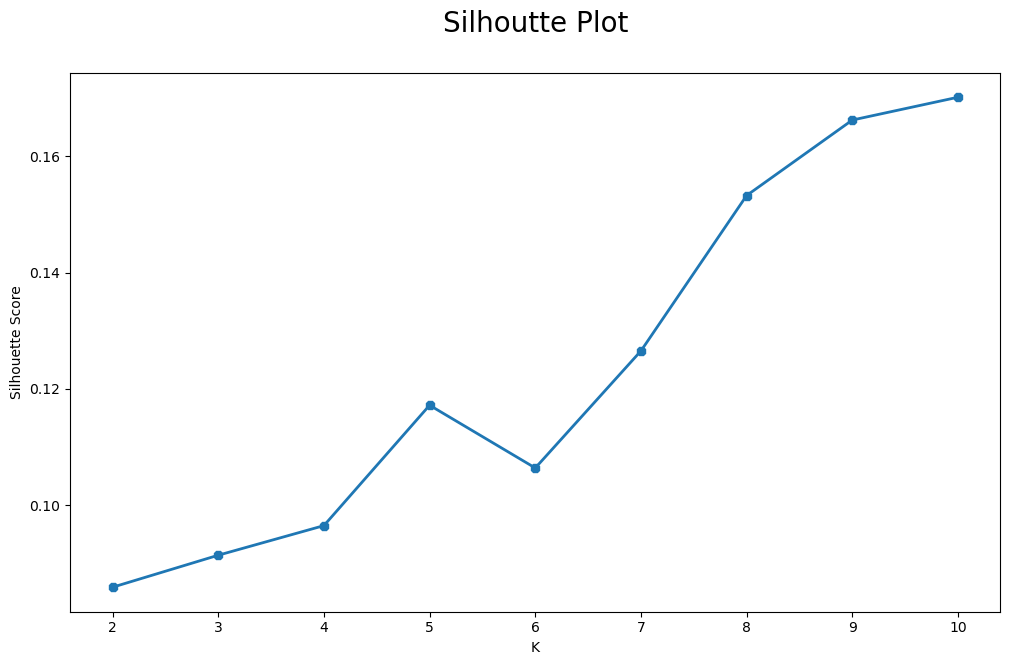

In [664]:
# plot of silhoutte score
silhouette_scaled = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    
    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_scaled, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

Based on the silhouette plot, I chose K = 10 since it had the highest silhouette score (above 0.16), which indicates the best cluster separation. This tells me that the data is most clearly grouped into 10 distinct clusters. I’ll use K = 10 for my final clustering because it provides the strongest overall structure according to this metric.

In [665]:
kmeans_scaled = KMeans(n_clusters=10, init='k-means++', random_state=42)
kmeans_scaled.fit(X1_scaled)


KMeans(n_clusters=10, random_state=42)

In [666]:
#Labels for scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([9, 0, 4, ..., 1, 1, 1], dtype=int32)

In [667]:
# centroids
kmeans_scaled.cluster_centers_

array([[-2.79532329e-01, -2.04023946e-01, -4.23973180e-01,
         1.80496984e+00, -2.23244798e-01, -1.87878486e-01,
        -2.72234899e-02, -1.72999051e-01,  7.66713908e-02,
        -4.10778989e-01, -2.52841341e-01, -2.70491571e-01,
         9.28669817e-02,  1.34935420e-01, -3.48381918e-01,
         1.09176944e-02,  9.60445547e-02],
       [ 1.11257258e+00, -1.09584054e-01, -3.45099043e-01,
        -4.44394541e-01, -2.75795057e-01,  2.40025539e-02,
         3.70989951e-02, -3.30265542e-01, -3.53351106e-02,
         2.06100425e+00, -3.01341217e-01, -4.95868836e-03,
        -2.32273454e-01, -1.35560615e-01, -5.67467950e-01,
        -1.11114922e-01, -4.97975672e-01],
       [ 1.30565154e-01, -2.26190437e-01,  7.10814143e-02,
        -1.33592734e-01, -2.05786791e-01, -1.88922050e-01,
        -4.11750770e-02, -2.71926846e-01, -4.04937319e-01,
        -3.53152931e-02, -1.57277061e-01,  2.81518319e+00,
        -2.24361839e-01, -1.07510459e-01, -2.63390446e-01,
        -6.11712831e-02,  3.2

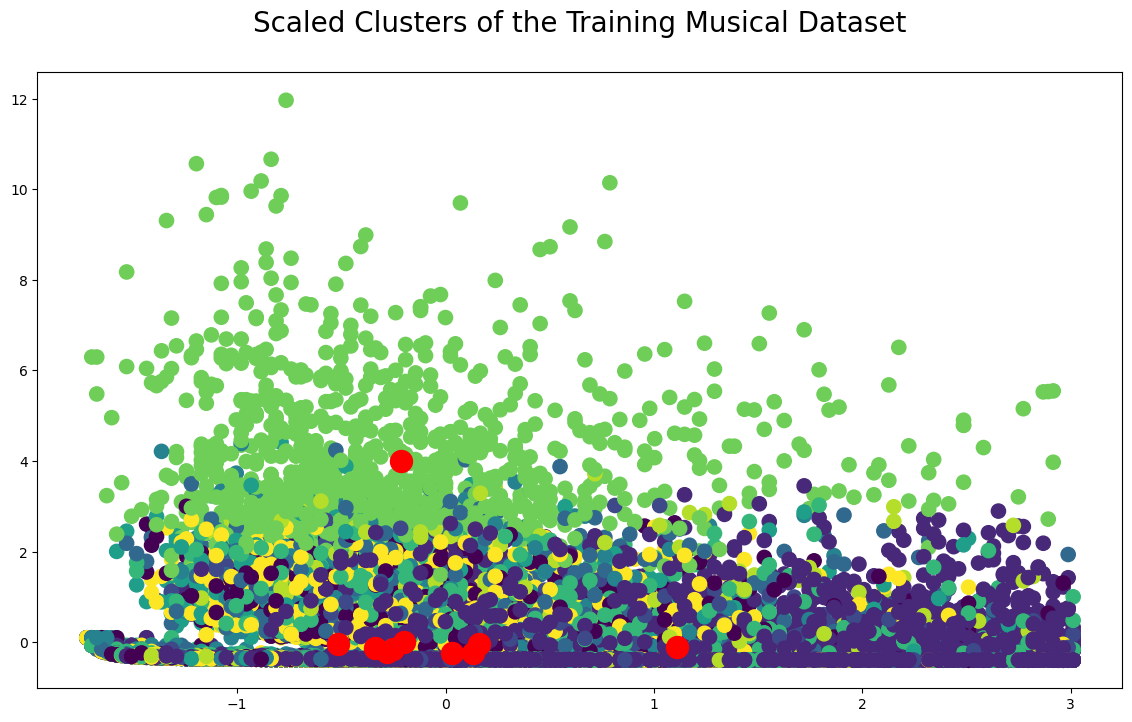

In [668]:
#Visualize scaled clusters as a scatter plot for model training
plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Scaled Clusters of the Training Musical Dataset\n', fontsize = 20)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [672]:
pca = PCA(n_components=2)
transformed_pca = pca.fit_transform(X1_scaled)

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(transformed_pca)


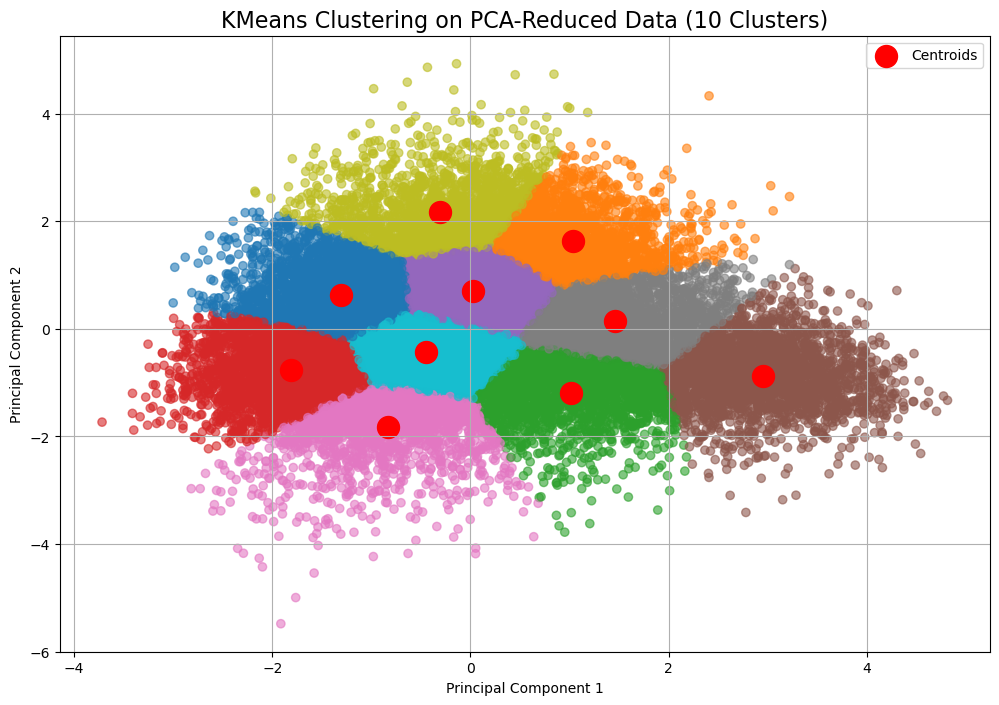

In [676]:
plt.figure(figsize=(12, 8))

# Scatter plot: points colored by cluster labels
plt.scatter(transformed_pca[:, 0], 
            transformed_pca[:, 1], 
            c=labels, 
            cmap='tab10',  # tab10 supports 10 unique colors
            alpha=0.6)

# Centroids from KMeans
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            color='red', 
            marker='o', 
            s=250, 
            label='Centroids')

# Plot aesthetics
plt.title('KMeans Clustering on PCA-Reduced Data (10 Clusters)', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [696]:
kmeans_orig = KMeans(n_clusters=10, random_state=42)
labels = kmeans_orig.fit_predict(X1_scaled)  # X1_scaled has shape (n_samples, 17)

#  build the DataFrame correctly
feature_names = ['len', 'dating', 'violence', 'world/life', 'night/time',
                 'shake the audience', 'family/gospel', 'romantic', 'communication',
                 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age']

clusters = pd.DataFrame(kmeans_orig.cluster_centers_.T,  # shape (17, 10)
                        columns=[f'Cluster_{i}' for i in range(10)],
                        index=feature_names)


In [697]:
top_features = clusters.apply(lambda x: x.abs().nlargest(4).index.tolist(), axis=0)
top_features_df = pd.DataFrame(top_features).T
top_features_df.columns = ['Top 1', 'Top 2', 'Top 3', 'Top 4']

print(top_features_df)


                        Top 1                     Top 2            Top 3  \
Cluster_0          world/life                  violence          obscene   
Cluster_1             obscene                       len          sadness   
Cluster_2     movement/places             communication         romantic   
Cluster_3          night/time                  violence       world/life   
Cluster_4               music                  violence              age   
Cluster_5            romantic                       age              len   
Cluster_6            violence                   sadness          obscene   
Cluster_7              dating                  violence  movement/places   
Cluster_8  shake the audience  light/visual perceptions    communication   
Cluster_9             sadness                  violence          obscene   

                Top 4  
Cluster_0     sadness  
Cluster_1         age  
Cluster_2     sadness  
Cluster_3     sadness  
Cluster_4  world/life  
Cluster_5    violen

In [ ]:
cleaned_df = pd.DataFrame(X1_scaled, columns=feature_names)
cleaned_df['Cluster'] = labels

cluster_names = {
    0: 'world/life_violence_obscene_sadness',
    1: 'obscene_len_sadness_age',
    2: 'movement/places_communication_romantic_sadness',
    3: 'night/time_violence_world/life_sadness',
    4: 'music_violence_age_world/life',
    5: 'romantic_age_len_violence',
    6: 'violence_sadness_obscene_world/life',
    7: 'dating_violence_movement/places_feelings',
    8: 'shake the audience_light/visual perceptions_communication_sadness',
    9: 'sadness_violence_obscene_world/life',
}
# Map cluster numbers to names
cleaned_df['Cluster Name'] = cleaned_df['Cluster'].map(cluster_names)

# Load metadata (columns that exist in your raw data)
df2 = pd.read_csv("/Users/sa21/Desktop/TLAB-Music-Recommendation/Data/raw/train.csv")
label = df2[['genre', 'artist_name', 'track_name', 'release_date']]

# Combine metadata and model results
final_df = pd.concat([label.reset_index(drop=True), cleaned_df.reset_index(drop=True)], axis=1)

# Reorder columns to put Cluster and Cluster Name first
ordered_cols = ['Cluster', 'Cluster Name'] + [col for col in final_df.columns if col not in ['Cluster', 'Cluster Name']]
final_df = final_df[ordered_cols]

# Sort by cluster number
final_df = final_df.sort_values(by='Cluster').reset_index(drop=True)

# Preview result
final_df.head()



,Cluster,Cluster Name,genre,artist_name,track_name,release_date,len,dating,violence,world/life,...,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,0,world/life_violence_obscene_sadness,blues,blues saraceno,mercy train,2014,-1.028679,-0.364466,-0.651238,1.152947,...,0.205343,-0.681552,-0.524850,-0.470574,-0.495784,-0.524658,-0.433669,-0.703174,-0.404314,-1.285269
1,0,world/life_violence_obscene_sadness,rock,pantera,the art of shredding,1990,-0.741809,-0.361244,0.152038,2.180900,...,-0.438232,-0.680011,-0.523919,-0.469207,-0.493942,-0.522774,4.686746,-0.702243,-0.401960,0.012963
2,0,world/life_violence_obscene_sadness,blues,z.z. hill,when can we do this again,1981,-0.048542,-0.387660,-0.658036,1.444084,...,-0.251118,0.647123,-0.531549,-0.480421,-0.509050,1.076365,-0.457469,-0.709879,-0.421265,0.499801
3,0,world/life_violence_obscene_sadness,rock,megadeth,dawn patrol,1990,-0.956962,-0.319366,0.737984,1.269808,...,-0.417557,-0.659983,-0.511824,-0.451427,-0.469990,2.520002,-0.387389,-0.690137,-0.371355,0.012963
4,0,world/life_violence_obscene_sadness,pop,natalie merchant,beloved wife,1995,-0.431034,-0.375958,-0.654606,2.845265,...,-0.445497,-0.687048,-0.528169,-0.475453,-0.502358,-0.531378,-0.445462,-0.330690,1.104755,-0.257502


In [736]:
# Filter songs that belong to Cluster 5
cluster_5_songs = final_df[final_df['Cluster'] == 5]


# Show the first 5 songs from Cluster 5
cluster_5_songs.head(5)

cluster_5_songs[['Cluster','Cluster Name','genre', 'artist_name', 'track_name', 'release_date']].head(5)


,Cluster,Cluster Name,genre,artist_name,track_name,release_date
14688,5,romantic_age_len_violence,pop,scouting for girls,she's so lovely,2007
14689,5,romantic_age_len_violence,blues,ella fitzgerald,always true to you in my fashion,1956
14690,5,romantic_age_len_violence,pop,johnny mathis,no love (but your love),1958
14691,5,romantic_age_len_violence,country,mindy mccready,all that i am,1996
14692,5,romantic_age_len_violence,pop,kylie minogue,hand on your heart,1989


In [737]:
final_df.to_csv("/Users/sa21/Desktop/TLAB-Music-Recommendation/Data/songs_with_clusters.csv", index=False)


## New Sample Prediction

In [710]:
new_df = pd.read_csv('/Users/sa21/Desktop/TLAB-Music-Recommendation/Data/recommend.csv')

feature_names = ['len', 'dating', 'violence', 'world/life', 'night/time',
                 'shake the audience', 'family/gospel', 'romantic', 'communication',
                 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age']

X_new = new_df[feature_names]



In [711]:
X_new_scaled = scaler.transform(X_new)

/opt/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [712]:
new_labels = kmeans_orig.predict(X_new_scaled)


In [713]:
new_predictions = pd.DataFrame(X_new_scaled, columns=feature_names)
new_predictions['Cluster'] = new_labels


In [742]:
cluster_names = {
    'Cluster_0': 'world/life_violence_obscene_sadness',
    'Cluster_1': 'obscene_len_sadness_age',
    'Cluster_2': 'movement/places_communication_romantic_sadness',
    'Cluster_3': 'night/time_violence_world/life_sadness',
    'Cluster_4': 'music_violence_age_world/life',
    'Cluster_5': 'romantic_age_len_violence',
    'Cluster_6': 'violence_sadness_obscene_world/lifel',
    'Cluster_7': 'dating_violence_movement/places_feelings',
    'Cluster_8': 'shake the audience_light/visual perceptions_communication_sadness',
    'Cluster_9': 'sadness_violence_obscene_world/life',
}

new_predictions['Cluster Name'] = new_predictions['Cluster'].map(cluster_names)
metadata = new_df[['artist_name', 'track_name']].reset_index(drop=True)


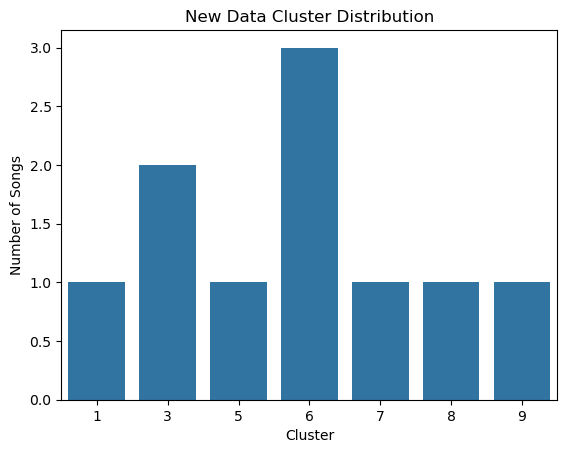

In [743]:
sns.countplot(data=new_predictions, x='Cluster')
plt.title("New Data Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.show()

In [744]:
new_predictions['Cluster Name'] = new_predictions['Cluster'].map(cluster_names)
# Move Cluster and Cluster Name to the front
cols = ['Cluster', 'Cluster Name'] + [col for col in new_predictions.columns if col not in ['Cluster', 'Cluster Name']]
new_predictions = new_predictions[cols]
new_predictions = pd.concat([metadata, new_predictions.reset_index(drop=True)], axis=1)

# Sort by cluster
new_predictions = new_predictions.sort_values(by='Cluster').reset_index(drop=True)

# Preview of all songs
new_predictions.head(11)

,artist_name,track_name,Cluster,Cluster Name,len,dating,violence,world/life,night/time,shake the audience,...,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,godsmack,immune,1,NaN,1.887828,-0.390237,-0.658791,0.075839,2.113359,-0.411827,...,-0.336437,-0.097159,2.001860,-0.481515,-0.510524,-0.539728,0.001211,-0.710624,-0.423148,-0.527967
1,dennis brown,second chance,3,NaN,-0.717904,-0.379749,-0.494964,-0.695418,2.228376,-0.398319,...,0.197620,3.196671,-0.529264,-0.477063,-0.504525,-0.533595,-0.449351,-0.707592,0.433986,-0.149316
2,the black crowes,sister luck,3,NaN,-0.765715,-0.374406,-0.654151,0.064830,3.887365,-0.391437,...,-0.444730,2.235623,-0.527721,-0.474794,-0.501470,-0.530471,-0.443869,-0.706048,-0.411579,0.229336
3,jerry lee lewis,your cheating heart,5,NaN,0.573009,-0.380788,-0.656022,-0.695734,-0.063159,-0.399657,...,4.645790,-0.689358,-0.529564,-0.477504,-0.505120,2.966110,-0.450417,-0.707893,-0.416242,1.311196
4,paul anka,eso beso,6,NaN,-0.454940,-0.381738,2.038110,-0.696023,-0.502602,-0.400881,...,-0.448350,-0.689812,-0.529838,-0.477907,-0.505663,0.326225,-0.451392,-0.540063,2.398551,0.012963
5,noro morales,silencio,6,NaN,-0.383223,-0.375204,2.068756,0.113678,-0.499544,-0.392465,...,-0.445124,1.480261,-0.527951,-0.475133,-0.501926,-0.530937,1.047899,-0.706279,0.050937,2.068499
6,rage against the machine,pistol grip pump,6,NaN,0.429574,-0.389541,2.380488,-0.036508,0.365806,-0.066362,...,-0.452202,-0.010288,-0.532092,-0.481220,-0.510126,-0.539321,-0.459399,-0.058052,-0.222840,-1.014804
7,taste,railway and gun,7,NaN,-1.148208,3.506697,-0.648540,-0.687972,0.647622,-0.366780,...,-0.435279,-0.677150,-0.522192,-0.466667,-0.490520,-0.519276,-0.424224,1.905675,-0.397588,1.635754
8,randy travis,messin' with my mind,8,NaN,0.023176,-0.385794,1.286387,1.477614,-0.504500,5.115865,...,-0.450352,-0.691752,-0.531010,-0.329793,-0.507983,-0.537130,-0.455554,-0.709340,-0.169436,-0.419781
9,paramore,playing god,9,NaN,-0.861338,0.587487,-0.653362,-0.692975,0.239180,0.490014,...,-0.443401,3.506233,-0.526943,-0.473652,-0.499930,-0.528896,-0.441106,1.022338,-0.409611,1.094824


In [745]:
new_predictions.to_csv("/Users/sa21/Desktop/TLAB-Music-Recommendation/Data/new_prediction.csv", index=False)
